In [1]:
import warnings
warnings.filterwarnings('ignore')

#### Importing Libraries

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.feature_selection import SelectKBest, f_regression
import joblib

#### Data Extraction

In [3]:
weather_data = pd.read_csv("./Datasets/Weather Dataset - 84071567.csv",skiprows = 3)
solar_output = pd.read_excel(r"./Datasets/PV Plants Datasets.xlsx",sheet_name = '84071567')
metadata = pd.read_excel("./Datasets/PV Plants Metadata.xlsx")

In [4]:
weather_data.head()

,time,temperature_2m (°C),relative_humidity_2m (%),rain (mm),cloud_cover (%),wind_speed_10m (km/h),shortwave_radiation (W/m²),direct_radiation (W/m²),diffuse_radiation (W/m²)
0,2019-01-01T00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2019-01-01T01:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2019-01-01T02:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2019-01-01T03:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2019-01-01T04:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
solar_output.head()

,Date,Produced Energy (kWh),Specific Energy (kWh/kWp),CO2 Avoided (tons)
0,2019-01-01 00:00:00,0.0,0.0,
1,2019-01-01 01:00:00,0.0,0.0,
2,2019-01-01 02:00:00,0.0,0.0,
3,2019-01-01 03:00:00,0.0,0.0,
4,2019-01-01 04:00:00,0.0,0.0,


In [6]:
metadata.head()

,PV Serial Number,Location,Latitude,Longitude,From date,To date,Installed Power (kWp),Connection Power (kWn)
0,84071567,Lisbon,38.728,-9.138,2019-01-01,2022-12-31,46.00,40.0
1,84071569,Lisbon,38.833,-9.191,2019-01-01,2022-12-31,16.32,15.0
2,84071568,Setubal,38.577,-8.872,2019-01-01,2022-12-31,23.52,20.0
3,84071570,Lisbon,38.725,-9.120,2019-01-01,2022-12-31,30.00,27.0
4,84071566,Faro,37.031,-7.893,2019-01-01,2022-12-31,7.00,6.6


In [7]:
#weather_data = pd.read_csv("./Datasets/Weather Dataset - 84071567.csv",skiprows = 3)
weather_data.dropna(subset = ['temperature_2m (°C)'], inplace=True)
#weather_data.fillna(0,inplace=True)
weather_data.reset_index(drop = True,inplace=True)
weather_data.rename(columns={"time": "Date"},inplace=True)
weather_data.head()

,Date,temperature_2m (°C),relative_humidity_2m (%),rain (mm),cloud_cover (%),wind_speed_10m (km/h),shortwave_radiation (W/m²),direct_radiation (W/m²),diffuse_radiation (W/m²)
0,2021-03-23T00:00,12.6,53.0,NaN,NaN,3.8,NaN,NaN,NaN
1,2021-03-23T01:00,12.2,54.0,0.0,7.0,3.0,0.0,0.0,0.0
2,2021-03-23T02:00,11.8,55.0,0.0,6.0,2.6,0.0,0.0,0.0
3,2021-03-23T03:00,11.5,56.0,0.0,6.0,2.3,0.0,0.0,0.0
4,2021-03-23T04:00,11.2,57.0,0.0,6.0,2.9,0.0,0.0,0.0


In [8]:
solar_output['PV Serial Number'] = 84071567

In [9]:
# Merge the datasets
solar_output = pd.merge(solar_output, metadata, on='PV Serial Number', how='inner')
solar_output.head()

,Date,Produced Energy (kWh),Specific Energy (kWh/kWp),CO2 Avoided (tons),PV Serial Number,Location,Latitude,Longitude,From date,To date,Installed Power (kWp),Connection Power (kWn)
0,2019-01-01 00:00:00,0.0,0.0,,84071567,Lisbon,38.728,-9.138,2019-01-01,2022-12-31,46.0,40.0
1,2019-01-01 01:00:00,0.0,0.0,,84071567,Lisbon,38.728,-9.138,2019-01-01,2022-12-31,46.0,40.0
2,2019-01-01 02:00:00,0.0,0.0,,84071567,Lisbon,38.728,-9.138,2019-01-01,2022-12-31,46.0,40.0
3,2019-01-01 03:00:00,0.0,0.0,,84071567,Lisbon,38.728,-9.138,2019-01-01,2022-12-31,46.0,40.0
4,2019-01-01 04:00:00,0.0,0.0,,84071567,Lisbon,38.728,-9.138,2019-01-01,2022-12-31,46.0,40.0


#### Data Preprocessing

In [10]:
# Convert dates to datetime format
solar_output['Date'] = pd.to_datetime(solar_output['Date'])
weather_data['Date'] = pd.to_datetime(weather_data['Date'])

In [11]:
# Merge weather data with solar output
merged_data = pd.merge(solar_output, weather_data, on=['Date'], how='inner')
merged_data.head()

,Date,Produced Energy (kWh),Specific Energy (kWh/kWp),CO2 Avoided (tons),PV Serial Number,Location,Latitude,Longitude,From date,To date,Installed Power (kWp),Connection Power (kWn),temperature_2m (°C),relative_humidity_2m (%),rain (mm),cloud_cover (%),wind_speed_10m (km/h),shortwave_radiation (W/m²),direct_radiation (W/m²),diffuse_radiation (W/m²)
0,2021-03-23 00:00:00,0.0,0.0,,84071567,Lisbon,38.728,-9.138,2019-01-01,2022-12-31,46.0,40.0,12.6,53.0,NaN,NaN,3.8,NaN,NaN,NaN
1,2021-03-23 01:00:00,0.0,0.0,,84071567,Lisbon,38.728,-9.138,2019-01-01,2022-12-31,46.0,40.0,12.2,54.0,0.0,7.0,3.0,0.0,0.0,0.0
2,2021-03-23 02:00:00,0.0,0.0,,84071567,Lisbon,38.728,-9.138,2019-01-01,2022-12-31,46.0,40.0,11.8,55.0,0.0,6.0,2.6,0.0,0.0,0.0
3,2021-03-23 03:00:00,0.0,0.0,,84071567,Lisbon,38.728,-9.138,2019-01-01,2022-12-31,46.0,40.0,11.5,56.0,0.0,6.0,2.3,0.0,0.0,0.0
4,2021-03-23 04:00:00,0.0,0.0,,84071567,Lisbon,38.728,-9.138,2019-01-01,2022-12-31,46.0,40.0,11.2,57.0,0.0,6.0,2.9,0.0,0.0,0.0


In [12]:
# Normalize energy output by installed power
merged_data['Specific Energy (kWh/kWp)'] = merged_data['Produced Energy (kWh)'] / merged_data['Installed Power (kWp)']

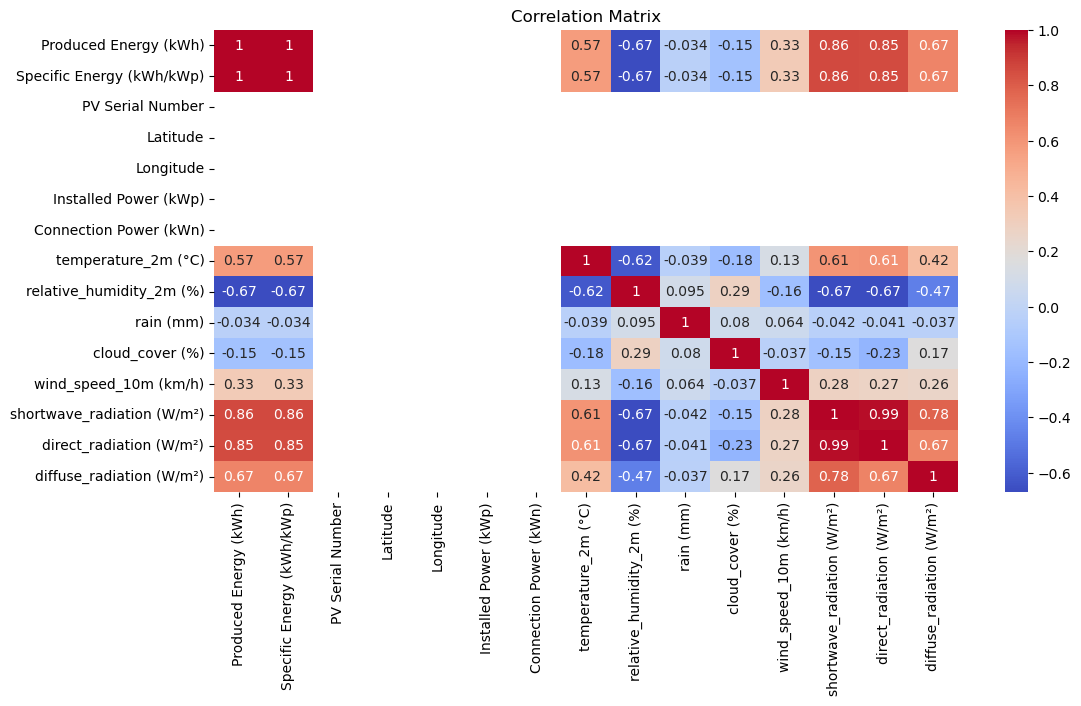

In [13]:
plt.figure(figsize=(12, 6))
sns.heatmap(merged_data.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()

In [12]:
# Extract time-related features
merged_data['Hour'] = merged_data['Date'].dt.hour
merged_data['Day'] = merged_data['Date'].dt.day
merged_data['Month'] = merged_data['Date'].dt.month
merged_data['Day of Year'] = merged_data['Date'].dt.dayofyear
merged_data['Weekday'] = merged_data['Date'].dt.weekday
merged_data['Is Weekend'] = (merged_data['Weekday'] >= 5).astype(int)

In [13]:
# Handle missing values
merged_data = merged_data.fillna(method='ffill').fillna(method='bfill')
merged_data.head()

,Date,Produced Energy (kWh),Specific Energy (kWh/kWp),CO2 Avoided (tons),PV Serial Number,Location,Latitude,Longitude,From date,To date,...,wind_speed_10m (km/h),shortwave_radiation (W/m²),direct_radiation (W/m²),diffuse_radiation (W/m²),Hour,Day,Month,Day of Year,Weekday,Is Weekend
0,2021-03-23 00:00:00,0.0,0.0,,84071567,Lisbon,38.728,-9.138,2019-01-01,2022-12-31,...,3.8,0.0,0.0,0.0,0,23,3,82,1,0
1,2021-03-23 01:00:00,0.0,0.0,,84071567,Lisbon,38.728,-9.138,2019-01-01,2022-12-31,...,3.0,0.0,0.0,0.0,1,23,3,82,1,0
2,2021-03-23 02:00:00,0.0,0.0,,84071567,Lisbon,38.728,-9.138,2019-01-01,2022-12-31,...,2.6,0.0,0.0,0.0,2,23,3,82,1,0
3,2021-03-23 03:00:00,0.0,0.0,,84071567,Lisbon,38.728,-9.138,2019-01-01,2022-12-31,...,2.3,0.0,0.0,0.0,3,23,3,82,1,0
4,2021-03-23 04:00:00,0.0,0.0,,84071567,Lisbon,38.728,-9.138,2019-01-01,2022-12-31,...,2.9,0.0,0.0,0.0,4,23,3,82,1,0


In [14]:
# Encode cyclical time features
merged_data['Hour_sin'] = np.sin(2 * np.pi * merged_data['Hour'] / 24)
merged_data['Hour_cos'] = np.cos(2 * np.pi * merged_data['Hour'] / 24)
merged_data['Month_sin'] = np.sin(2 * np.pi * merged_data['Month'] / 12)
merged_data['Month_cos'] = np.cos(2 * np.pi * merged_data['Month'] / 12)

#### Feature Engineering

In [15]:
# Normalize energy output by installed power
merged_data['Specific Energy (kWh/kWp)'] = merged_data['Produced Energy (kWh)'] / merged_data['Installed Power (kWp)']

In [16]:
merged_data.columns

Index(['Date', 'Produced Energy (kWh)', 'Specific Energy (kWh/kWp)',
       'CO2 Avoided (tons)', 'PV Serial Number', 'Location', 'Latitude',
       'Longitude', 'From date', 'To date', 'Installed Power (kWp)',
       'Connection Power (kWn)', 'temperature_2m (°C)',
       'relative_humidity_2m (%)', 'rain (mm)', 'cloud_cover (%)',
       'wind_speed_10m (km/h)', 'shortwave_radiation (W/m²)',
       'direct_radiation (W/m²)', 'diffuse_radiation (W/m²)', 'Hour', 'Day',
       'Month', 'Day of Year', 'Weekday', 'Is Weekend', 'Hour_sin', 'Hour_cos',
       'Month_sin', 'Month_cos'],
      dtype='object')

#### Exploratory Data Analysis (EDA)

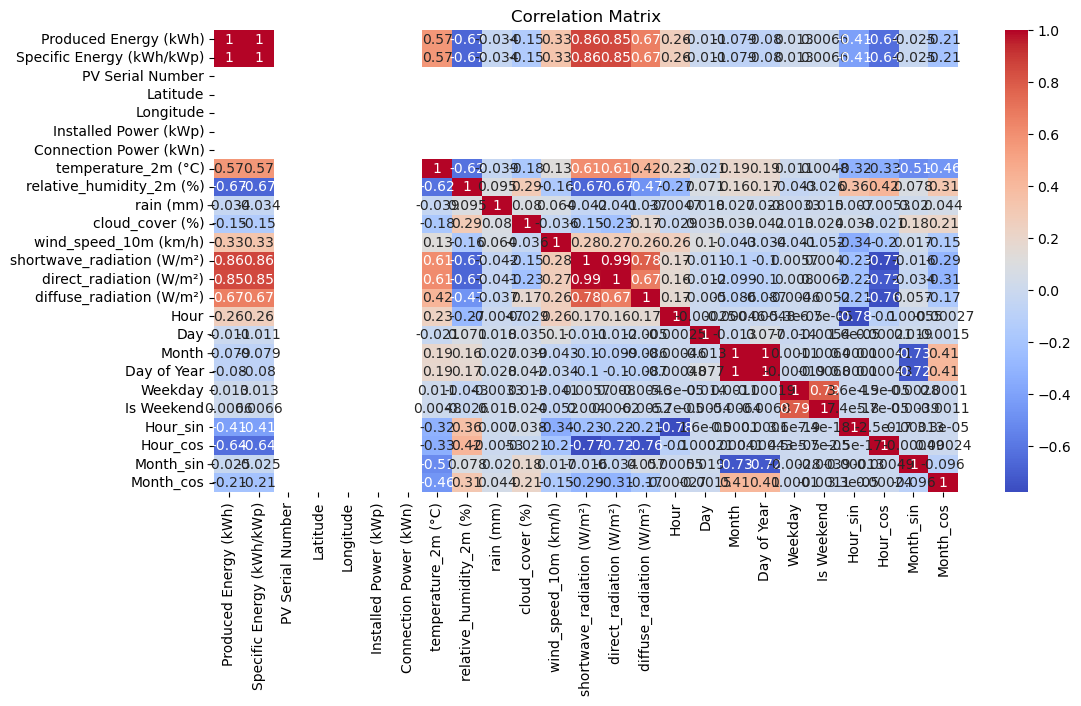

In [17]:
plt.figure(figsize=(12, 6))
sns.heatmap(merged_data.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()

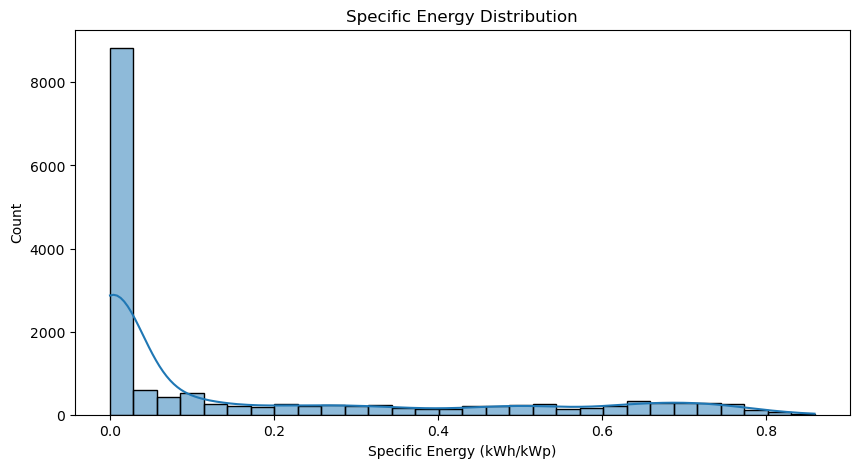

In [18]:
plt.figure(figsize=(10, 5))
sns.histplot(merged_data['Specific Energy (kWh/kWp)'], kde=True, bins=30)
plt.title("Specific Energy Distribution")
plt.show()

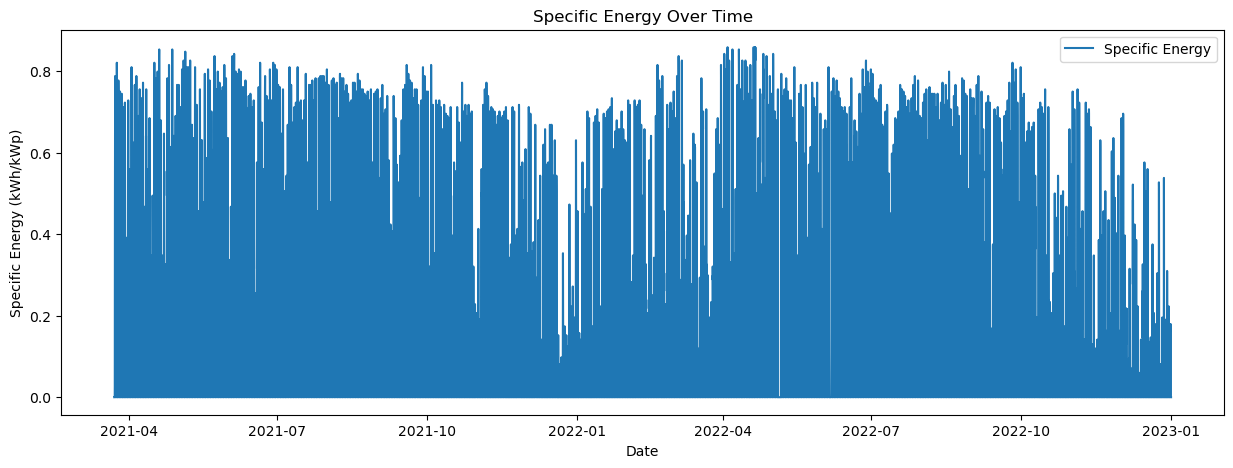

In [20]:
# Time series analysis
plt.figure(figsize=(15, 5))
plt.plot(merged_data['Date'], merged_data['Specific Energy (kWh/kWp)'], label='Specific Energy')
plt.title("Specific Energy Over Time")
plt.xlabel("Date")
plt.ylabel("Specific Energy (kWh/kWp)")
plt.legend()
plt.show()

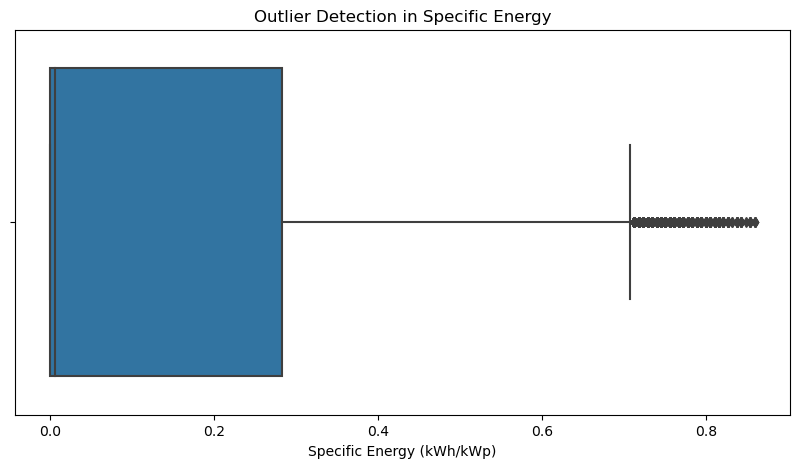

In [21]:
plt.figure(figsize=(10, 5))
sns.boxplot(x=merged_data['Specific Energy (kWh/kWp)'])
plt.title("Outlier Detection in Specific Energy")
plt.show()


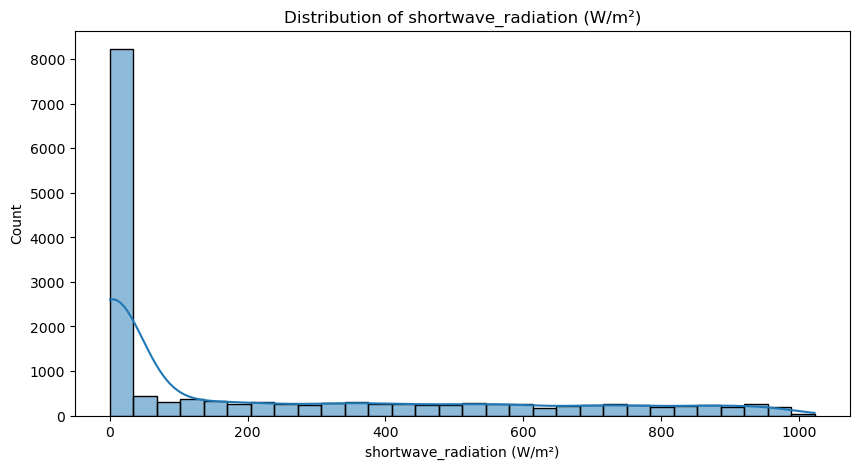

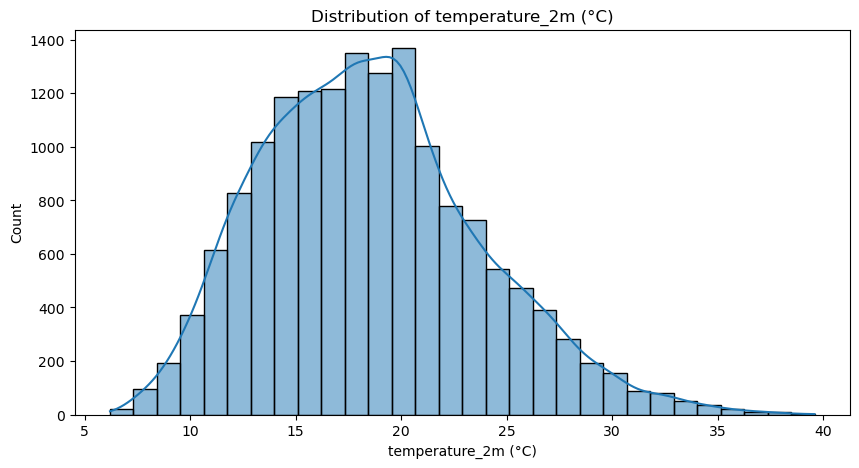

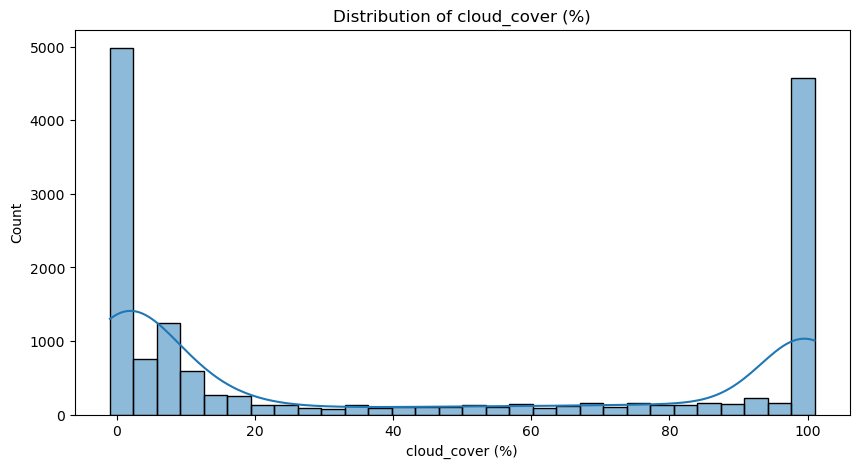

In [27]:
features = ['shortwave_radiation (W/m²)', 'temperature_2m (°C)', 'cloud_cover (%)']
for feature in features:
    plt.figure(figsize=(10, 5))
    sns.histplot(merged_data[feature], kde=True, bins=30)
    plt.title(f"Distribution of {feature}")
    plt.show()


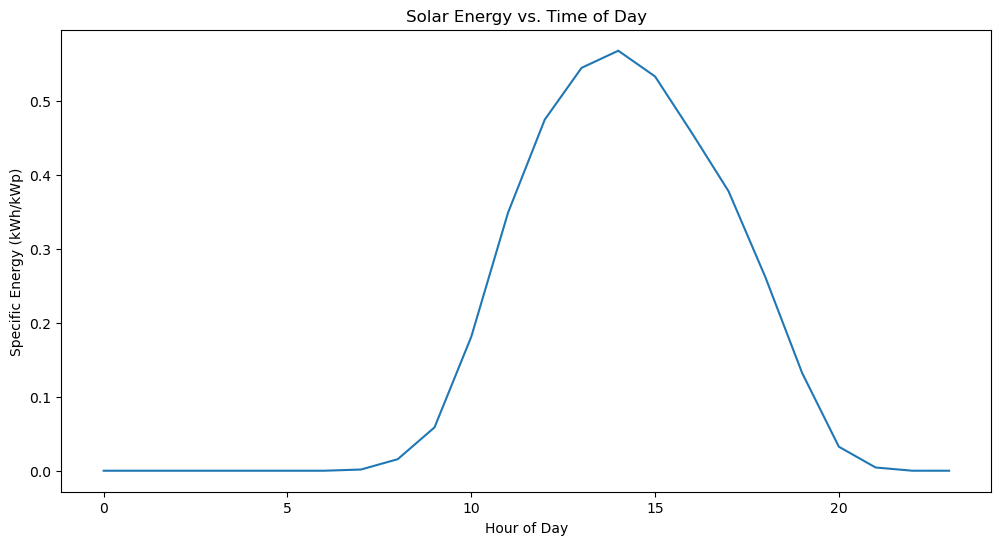

In [44]:
plt.figure(figsize=(12, 6))
sns.lineplot(x=merged_data['Hour'], y=merged_data['Specific Energy (kWh/kWp)'], ci=None)
plt.title("Solar Energy vs. Time of Day")
plt.xlabel("Hour of Day")
plt.ylabel("Specific Energy (kWh/kWp)")
plt.show()

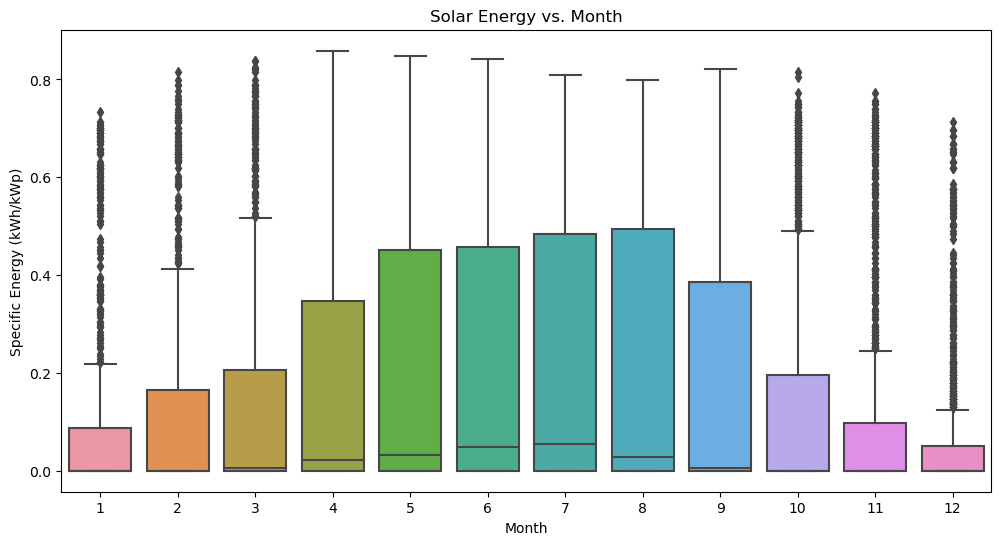

In [45]:
plt.figure(figsize=(12, 6))
sns.boxplot(x=merged_data['Month'], y=merged_data['Specific Energy (kWh/kWp)'])
plt.title("Solar Energy vs. Month")
plt.xlabel("Month")
plt.ylabel("Specific Energy (kWh/kWp)")
plt.show()

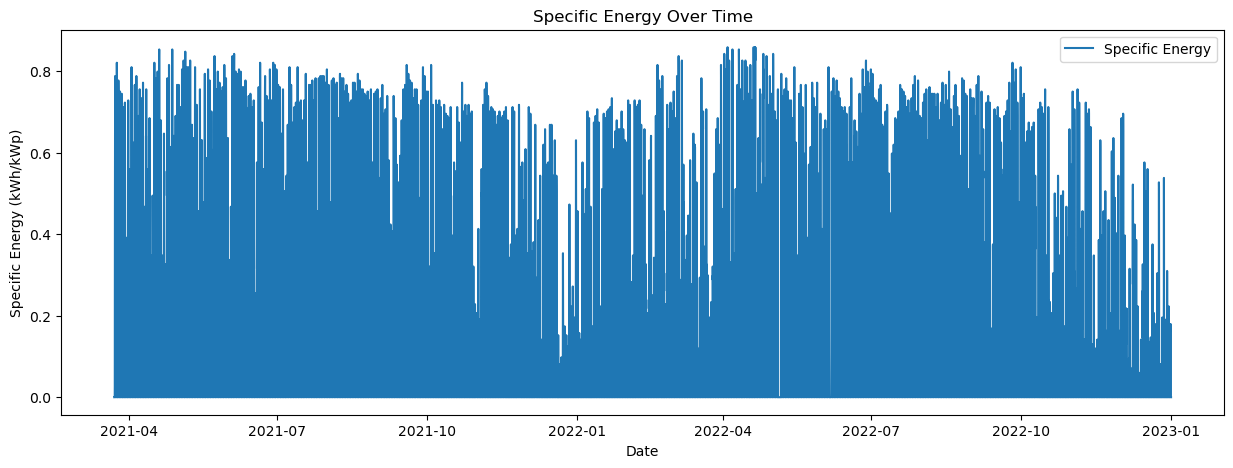

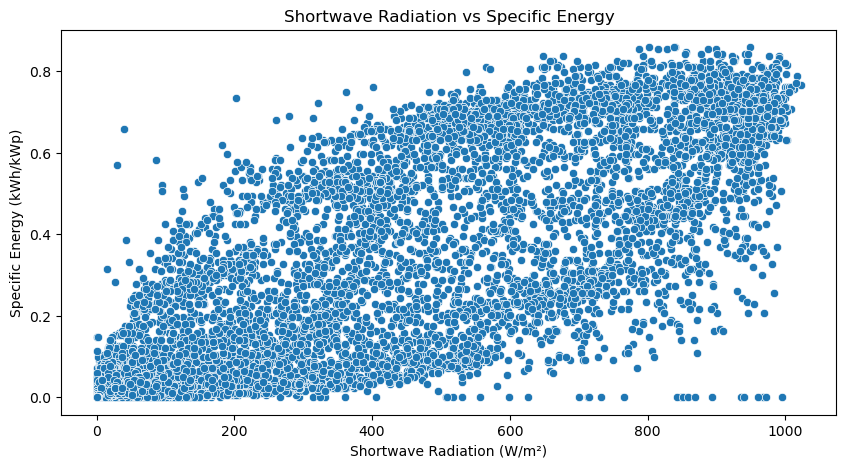

In [85]:
# Scatter plot of radiation vs energy
plt.figure(figsize=(10, 5))
sns.scatterplot(x='shortwave_radiation (W/m²)', y='Specific Energy (kWh/kWp)', data=merged_data)
plt.title("Shortwave Radiation vs Specific Energy")
plt.xlabel("Shortwave Radiation (W/m²)")
plt.ylabel("Specific Energy (kWh/kWp)")
plt.show()

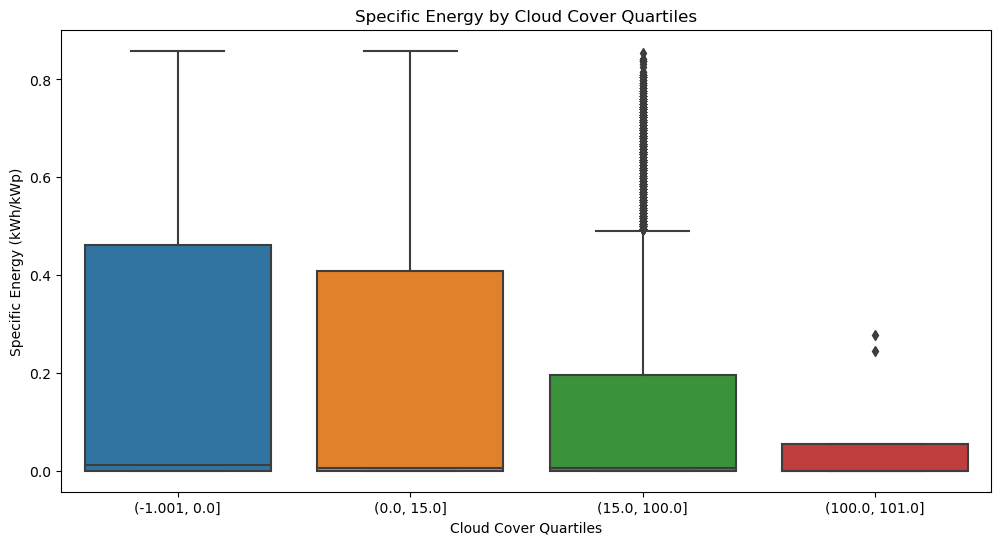

In [87]:
# Boxplot of energy by cloud cover levels
plt.figure(figsize=(12, 6))
sns.boxplot(x=pd.qcut(merged_data['cloud_cover (%)'], q=4), y='Specific Energy (kWh/kWp)', data=merged_data)
plt.title("Specific Energy by Cloud Cover Quartiles")
plt.xlabel("Cloud Cover Quartiles")
plt.ylabel("Specific Energy (kWh/kWp)")
plt.show()

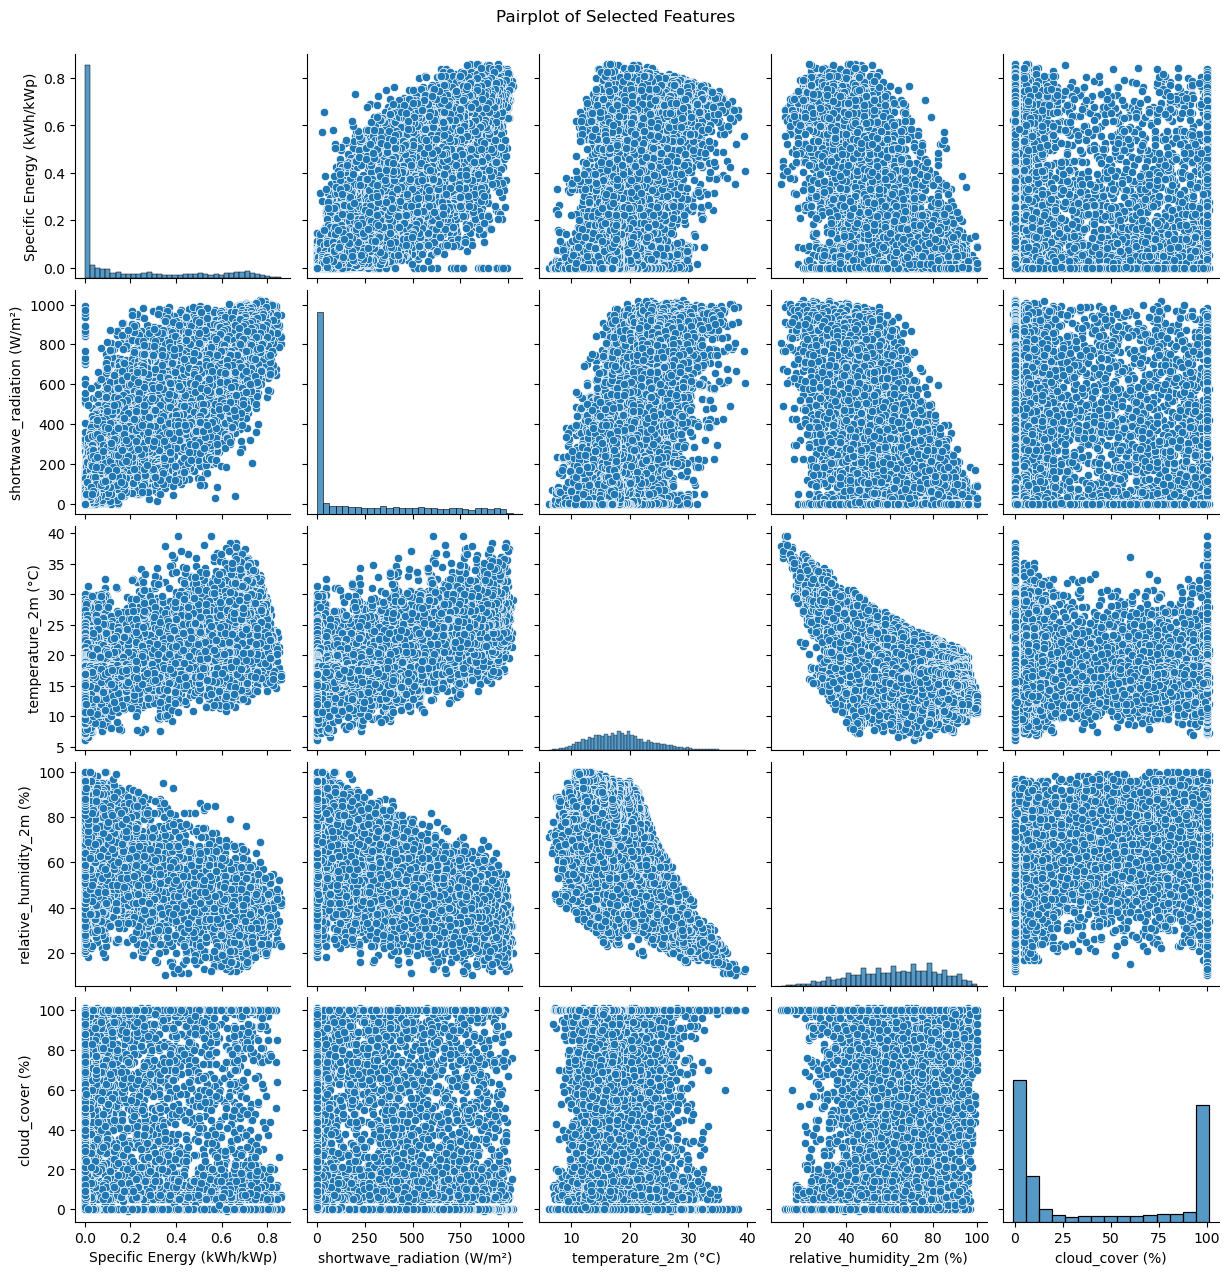

In [90]:
# Pairplot for selected features
selected_features_for_eda = ['Specific Energy (kWh/kWp)', 'shortwave_radiation (W/m²)', 'temperature_2m (°C)', 'relative_humidity_2m (%)', 'cloud_cover (%)']
sns.pairplot(merged_data[selected_features_for_eda])
plt.suptitle("Pairplot of Selected Features", y=1.02)
plt.show()

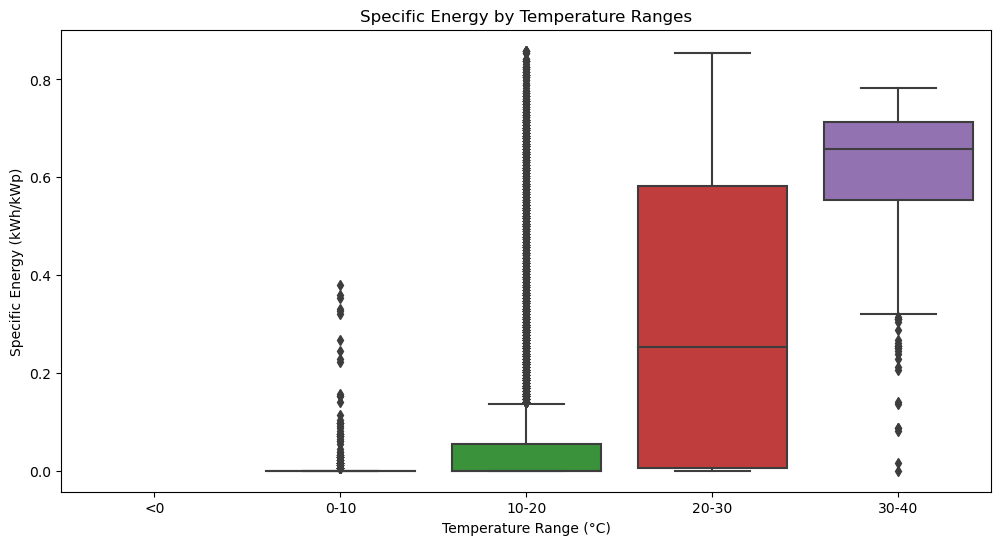

In [92]:
# Boxplot of Specific Energy by Temperature Ranges
plt.figure(figsize=(12, 6))
merged_data['Temperature Range'] = pd.cut(merged_data['temperature_2m (°C)'], bins=[-10, 0, 10, 20, 30, 40], labels=['<0', '0-10', '10-20', '20-30', '30-40'])
sns.boxplot(x='Temperature Range', y='Specific Energy (kWh/kWp)', data=merged_data)
plt.title("Specific Energy by Temperature Ranges")
plt.xlabel("Temperature Range (°C)")
plt.ylabel("Specific Energy (kWh/kWp)")
plt.show()

In [36]:
merged_data['Time']

0        00:00:00
1        01:00:00
2        02:00:00
3        03:00:00
4        04:00:00
           ...   
15570    19:00:00
15571    20:00:00
15572    21:00:00
15573    22:00:00
15574    23:00:00
Name: Time, Length: 15575, dtype: object

In [48]:
# Feature Selection
X = merged_data[['shortwave_radiation (W/m²)', 'direct_radiation (W/m²)', 'diffuse_radiation (W/m²)',
                 'temperature_2m (°C)', 'relative_humidity_2m (%)', 'cloud_cover (%)',
                 'rain (mm)', 'wind_speed_10m (km/h)', 'Latitude', 'Longitude',
                 'Hour_sin', 'Hour_cos', 'Month_sin', 'Month_cos']]
y = merged_data['Specific Energy (kWh/kWp)']

In [51]:
# Select top features
selector = SelectKBest(score_func=f_regression, k=10)
X_selected = selector.fit_transform(X, y)
selected_features = X.columns[selector.get_support()]
print("Selected Features:", selected_features)

Selected Features: Index(['shortwave_radiation (W/m²)', 'direct_radiation (W/m²)',
       'diffuse_radiation (W/m²)', 'temperature_2m (°C)',
       'relative_humidity_2m (%)', 'cloud_cover (%)', 'wind_speed_10m (km/h)',
       'Hour_sin', 'Hour_cos', 'Month_cos'],
      dtype='object')


In [52]:
# Split the data
X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, random_state=42)

Linear Regression RMSE: 0.11330381599699242
Linear Regression R2: 0.7996937346736069
Random Forest RMSE: 0.07190333932739112
Random Forest R2: 0.9193315744630097


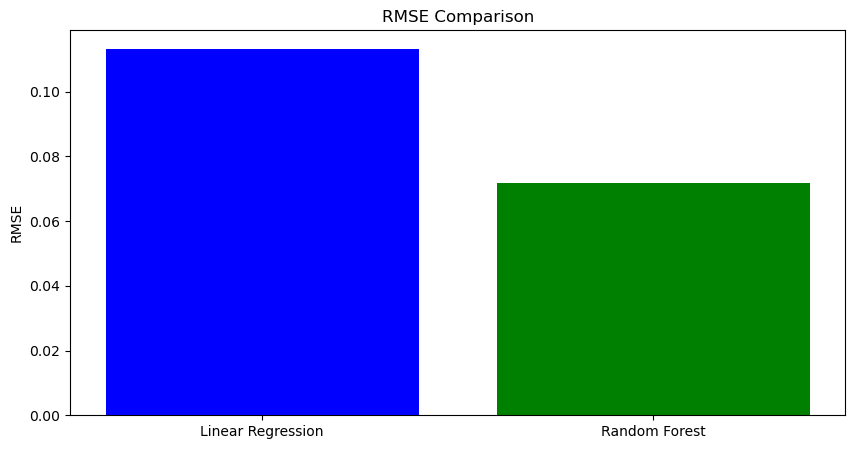

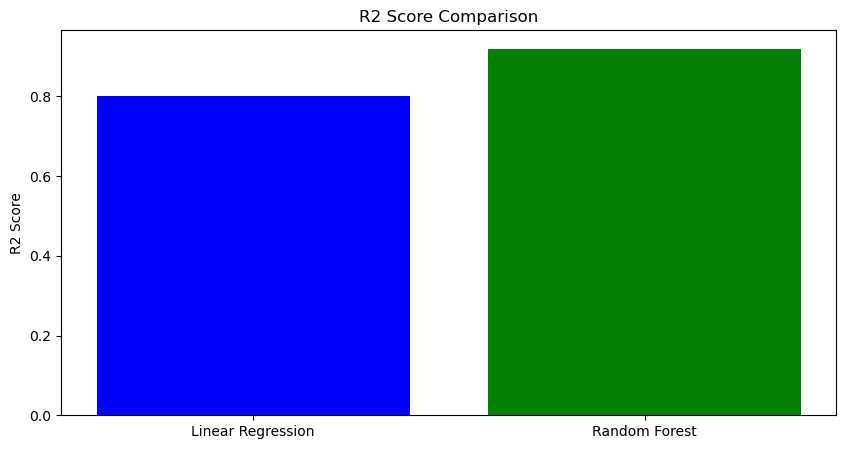

Random Forest model saved as best_model.pkl


In [58]:
# Model Building
# Linear Regression
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
lr_preds = lr_model.predict(X_test)

# Random Forest
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
rf_preds = rf_model.predict(X_test)

# Model Evaluation
# Linear Regression Metrics
lr_rmse = np.sqrt(mean_squared_error(y_test, lr_preds))
lr_r2 = r2_score(y_test, lr_preds)
print("Linear Regression RMSE:", lr_rmse)
print("Linear Regression R2:", lr_r2)

# Random Forest Metrics
rf_rmse = np.sqrt(mean_squared_error(y_test, rf_preds))
rf_r2 = r2_score(y_test, rf_preds)
print("Random Forest RMSE:", rf_rmse)
print("Random Forest R2:", rf_r2)

# Model Comparison
models = ['Linear Regression', 'Random Forest']
rmse_scores = [lr_rmse, rf_rmse]
r2_scores = [lr_r2, rf_r2]

plt.figure(figsize=(10, 5))
plt.bar(models, rmse_scores, color=['blue', 'green'])
plt.title("RMSE Comparison")
plt.ylabel("RMSE")
plt.show()

plt.figure(figsize=(10, 5))
plt.bar(models, r2_scores, color=['blue', 'green'])
plt.title("R2 Score Comparison")
plt.ylabel("R2 Score")
plt.show()

# Save the better model
if rf_r2 > lr_r2:
    joblib.dump(rf_model, 'best_model.pkl')
    print("Random Forest model saved as best_model.pkl")
else:
    joblib.dump(lr_model, 'best_model.pkl')
    print("Linear Regression model saved as best_model.pkl")

In [2]:
# Real-time Prediction Function
def predict_energy(weather_data, metadata):
    """
    Predict energy generation for new location-specific weather data.

    Parameters:
    weather_data: pd.DataFrame - Real-time weather data (features: selected_features).
    metadata: dict - Metadata for the location (keys: Latitude, Longitude, Installed Power).

    Returns:
    Predicted Specific Energy (kWh/kWp) and total energy (kWh).
    """
    model = joblib.load('best_model.pkl')
    weather_data['Latitude'] = metadata['Latitude']
    weather_data['Longitude'] = metadata['Longitude']
    X_real_time = weather_data[selected_features]
    specific_energy = model.predict(X_real_time)
    total_energy = specific_energy * metadata['Installed Power']
    return specific_energy, total_energy

In [60]:
merged_data.columns

Index(['Date', 'Produced Energy (kWh)', 'Specific Energy (kWh/kWp)',
       'CO2 Avoided (tons)', 'PV Serial Number', 'Location', 'Latitude',
       'Longitude', 'From date', 'To date', 'Installed Power (kWp)',
       'Connection Power (kWn)', 'temperature_2m (°C)',
       'relative_humidity_2m (%)', 'rain (mm)', 'cloud_cover (%)',
       'wind_speed_10m (km/h)', 'shortwave_radiation (W/m²)',
       'direct_radiation (W/m²)', 'diffuse_radiation (W/m²)', 'Time', 'Hour',
       'Day', 'Month', 'Day of Year', 'Weekday', 'Is Weekend', 'Hour_sin',
       'Hour_cos', 'Month_sin', 'Month_cos'],
      dtype='object')

In [68]:
selected_features

Index(['shortwave_radiation (W/m²)', 'direct_radiation (W/m²)',
       'diffuse_radiation (W/m²)', 'temperature_2m (°C)',
       'relative_humidity_2m (%)', 'cloud_cover (%)', 'wind_speed_10m (km/h)',
       'Hour_sin', 'Hour_cos', 'Month_cos'],
      dtype='object')

In [5]:
arcotWeather = pd.read_csv(r'./Datasets/ArcotWeather_nov.csv',skiprows=3)
#arcotWeather = arcotWeather[arcotWeather['direct_radiation (W/m²)'] != 0.0]
#arcotWeather.dropna(subset = ['direct_radiation (W/m²)'], inplace=True)
arcotWeather.reset_index(drop = True,inplace=True)
arcotWeather.rename(columns={"time": "Date"},inplace=True)
arcotWeather['Date'] = pd.to_datetime(arcotWeather['Date'])
arcotWeather['Hour'] = arcotWeather['Date'].dt.hour
arcotWeather['Month'] = arcotWeather['Date'].dt.month
arcotWeather['Date_only'] = arcotWeather['Date'].dt.date.astype(str)
arcotWeather['Hour_sin'] = np.sin(2 * np.pi * arcotWeather['Hour'] / 24)
arcotWeather['Hour_cos'] = np.cos(2 * np.pi * arcotWeather['Hour'] / 24)
arcotWeather['Month_cos'] = np.cos(2 * np.pi * arcotWeather['Month'] / 12)

In [6]:
selected_features

NameError: name 'selected_features' is not defined

In [7]:
result = (
    arcotWeather.groupby('Date_only')
    .apply(lambda x: x.drop(columns=['Date', 'Date_only']).values.tolist())
    .to_dict()
)

In [1]:
# Example usage:
total_list = []
for key,parameters in result.items():
    total_energy_total = 0
    for parameter in parameters:
        real_time_weather = pd.DataFrame({
             'shortwave_radiation (W/m²)': [parameter[5]],
             'direct_radiation (W/m²)': [parameter[6]],
             'diffuse_radiation (W/m²)': [parameter[7]],
             'temperature_2m (°C)': [parameter[0]],
             'relative_humidity_2m (%)': [parameter[1]],
             'cloud_cover (%)': [parameter[3]],
             'wind_speed_10m (km/h)': [parameter[4]],
             'Hour_sin': [parameter[10]],
             'Hour_cos': [parameter[11]],
             'Month_cos': [parameter[12]]
         })
        metadata = {'Latitude': 28.7041, 'Longitude': 77.1025, 'Installed Power': 310.0} #310.0
        specific_energy, total_energy = predict_energy(real_time_weather, metadata)
        #print(key)
        #print(specific_energy,total_energy)
        #print(f"Specific Energy: {specific_energy} kWh/kWp")
        #print(f"Total Energy: {total_energy} kWh")
        total_energy_total = total_energy_total + total_energy
        #total = {'Date':key,'Total_Solar_Energy':total_energy[0]}
        #total_list.append(total)
    total = {'Date':key,'Total_Solar_Energy':total_energy_total[0]}
    total_list.append(total)
    print(key + str(total_energy_total))
res_df = pd.DataFrame(total_list)    
res_df

NameError: name 'result' is not defined

In [98]:
res_df.to_excel('outout.xlsx')